In [1]:
from main_test.will_gen_data import *
import main_test.run as run
from my_mdnd import mdnd
import networkx as nx
import pygraphviz
import time

In [2]:
params = {
    'num_clusters': 5,
    'cluster_size': [10,10,10,10,10],
    'num_per_cluster': [100,100,100,100,100],
    'overlap': 3,
    'bg_prob': 0.2
}
will_gen_data(params)

[15  1  5  3 17 16  4  6 14  2 18  0 19 33 21 36 37 35  9 39 34 40 25 20
 43 12 45 29 13 27 22 41 26 24 30 11  7 48  8 49 44 38 47 31 52 50 42 32
 28 10 46 23 51]
[11, 1, 9, 3, 6, 2, 7, 36, 38, 18, 49, 35, 25, 28, 8, 0, 5, 4, 10, 12, 23, 14, 30, 51, 33, 22, 32, 29, 48, 27, 34, 43, 47, 13, 20, 17, 15, 16, 41, 19, 21, 31, 46, 24, 40, 26, 50, 42, 37, 39, 45, 52, 44]


In [3]:
def get_color(cluster):
    """
    return a mapping of 9 colors
    """
    c = ['red', 'green', 'blue','yellow','purple','orange','brown','pink','black']
    count = Counter(cluster).most_common()
    count = [c[0] for c in count]
    color = {count[x]: c[x] if x < 8 else c[8] for x in range(len(count))}
    res = [color[c] for c in cluster]
    return res

In [4]:
links_train,links_test,clusters_train,clusters_test,nodes,node_clusters = run.get_data_will('toy_test',ratio=0.9)


500


Dirichlet Process gibbs sampler


/home/drproduck/dnm/my_mdnd.py:173: RuntimeWarning: divide by zero encountered in log
  return np.log(Nk) + np.log(wu) + np.log(wv)


burn in | iter 0, number of clusters 6
[0 3 2 0 0 3 0 1 1 0 1 1 1 2 0 0 3 3 2 1 3 2 1 1 1 1 0 2 3 2 2 2 3 1 1 1 0
 2 0 2 0 3 2 2 2 0 3 0 2 3 2 1 2 2 0 1 2 0 1 3 2 0 1 1 2 0 1 1 0 2 3 0 0 1
 2 0 3 3 1 0 3 2 1 2 2 2 2 1 0 2 1 1 2 2 1 0 2 2 2 2 2 1 0 5 0 3 0 0 1 1 0
 2 0 2 0 1 1 0 0 1 2 1 0 0 2 2 2 0 1 3 1 0 1 2 2 3 1 2 3 2 1 1 1 0 3 3 1 2
 1 1 2 1 3 0 2 0 1 1 2 0 1 1 1 2 3 0 2 0 2 1 2 0 2 0 1 1 1 3 1 1 0 0 3 1 2
 0 1 2 3 2 2 1 0 5 2 1 1 1 2 3 0 1 1 2 2 1 2 0 0 1 0 2 2 3 2 0 0 1 2 2 3 2
 3 3 0 1 0 2 1 2 1 0 1 1 2 1 2 1 2 2 2 1 0 0 0 1 2 1 0 0 2 0 0 2 1 0 1 2 3
 1 2 0 0 1 2 2 2 1 2 2 1 3 2 2 1 3 1 3 3 2 2 2 3 1 2 0 1 1 0 1 2 3 2 0 2 1
 0 2 2 2 0 1 0 2 1 2 0 1 3 1 2 1 2 1 0 0 3 0 1 2 2 0 2 1 2 2 3 1 1 3 1 1 1
 0 3 2 2 1 0 2 2 0 2 1 1 1 1 2 2 0 1 3 3 3 2 2 0 0 1 0 2 5 1 2 3 0 1 2 3 3
 2 1 1 1 0 0 2 0 0 1 0 0 1 0 2 1 3 2 0 0 0 1 1 0 1 0 1 3 2 2 3 1 0 0 2 0 0
 1 1 1 2 0 2 0 1 3 0 1 2 3 0 3 2 2 3 0 2 1 1 0 0 1 0 0 2 0 2 1 2 3 0 1 0 0
 1 2 0 1 1 4]
burn in | iter 1, number of clusters 10
[3 3 2 

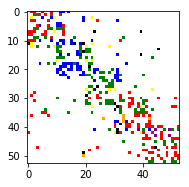

train | iter 1, number of clusters 21, cluster indices [0, 1, 2, 3, 5, 12, 15, 17, 14, 20, 8, 7, 18, 19, 13, 9, 4, 10, 11, 16, 21]
[ 1  2  2  1  0  0  1  1  1 14  1  2  2  2  1  0  0  2  2  2  3  1  1  1
  1  1  2  2  0  2  1  2 16  1  1  1  0  2  3  5  0  3  2  3  1  1  2  2
  2  1  2  1  2  3 18  1  2  0  3  2  2  0  1  2  9  0  1  1  2  0  0  0
  0  1  2  2  0  1 11  2  2  2  1  0  2 12  1  1  0  0  1  0  7  2  1  0
  2  0  0  2  8 14  0  3  0  1  7 15  1  2  0  2  2  1  0  1  1  1  0  0
  1  1  0  0  2  1  2  0  1  7  1  0  1  2  2  3  0  1  0  2 17 14  1  0
  2  2  1  2  1  2  2  8  1  0  0  0  1  9  3  0  1  1  5  2  2  0  2  0
  2  0  1  1  2  0  2  1  2  3  1  1  0  2  1  3  2  0  1  2  0  1  2  1
  0  2  0  1  1  2  5  1  1  1  1  1  2  1  2  0  0  1  3  2  0  0 14  2
  0  1  1  2  1  2  2  3  2  8  0  2  2  2  0  0  1  1  2  1  5  1  1  1
  1  3  0  0  2  1 20  1  2  2  2  0  0  1  1  0  2  2  1  2  2  2  1  2
  2  2  2  0  2  2  0  0  5  2  0  3  1  1  3  4  1  5 15  1  0  0

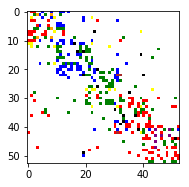

train | iter 2, number of clusters 22, cluster indices [0, 1, 2, 3, 5, 12, 15, 17, 14, 8, 7, 19, 13, 9, 4, 10, 6, 11, 18, 21, 22, 23]
[ 1  2  2  1  0  0  1  5  1 14  1  2  2  2  7  0  0  2  2  2  3  1  1  1
  1  1  2  2  0  2  1  2 14  1  1  1  0  2 19 23  0  3  2 12  1  1  2  2
  2  1  2  1  2  3  9  1  2  1  3  2  2  0  1  2  4  1  1  1  2  0  0  2
  0  1  2  2  0  1  2  2  0  2  1  0  2 18  1  1  0  0  1  0  7  2  1  0
  2  0  0  2  6  1  0  2  0  1  7  4  1  1  0  2  2  1  0 17  1  1  0  0
  1  1  0  0  2  1  2  0  1  2  1  0  1  2  2  3  0  1  2  2 17 14  1  0
  2  2  1  2  1  2  2  6  1  0  0  0  1  2 18  0  1  1  2  2  2  0  2  0
  2  0  1  1  2  0  2  1  2  3  1  1  0  2  1  3  2  2  1  2  2  2  2  1
  0  2  2  1  1  2  5  1  1  1  1  1  2  1  2  0  0  1  3  2  0  0 21  2
  0  1  1  2  1  2  2  3  2  0  5  2  2  2  0  0  1  1  2  1  5  1  1  2
  1 10  0  0  2  1  1  1  2  0  2  0  0  1 17  0  2  2  1 11  2  2  0  2
  2  2  2  0  2  2  0  9  2  2  0  3  1  1  3  0  1  5  2  1  1

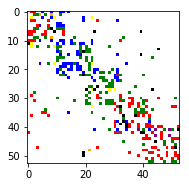

train | iter 3, number of clusters 19, cluster indices [0, 1, 2, 3, 5, 12, 17, 14, 8, 7, 19, 6, 22, 23, 16, 11, 4, 15, 10]
[ 1  2  2  1  0  0  1  1  1 14  1  2  2  2  1  0  0  2  2  2 11  1  1  1
  1  1  2  2  0  2  2  2  0  1  1  1  0  2  3  5  0  3  2 11  1  1  2  2
  2  1  2  1  2 11  0  1  2  0  3  2  2  0  1  2  0  0  1  1  2  0  0  2
  0  1  2  0  0  1 12  2  0  2  1  0  2 12  1  1  0  0  1  0 22  2  1  0
  2  0  0  2  1 14  0  3  0  1  0  7  1  2  0  2  2  1  0 17  1  1  0  0
  1  1  0  0  2  1  5  0  1  2  1  0  1  2  2  3  0  1  2  2 17 14  1 16
  2  2  1  2  1  2  2  1  1  0  0  0  1  2 12  0  1  1  2  2  2  0  2  0
  2  1  1  1  2  0  2  1  2  3  1  1  0  2  1  3  2  0  1  2  2  2  2  1
  0  2  2  1  1  2  5  1  1  1  1  1  2  1  2  0  0  1  3  2  0  0 14  2
  0  1  1  0  1  2  2  3  2  8  0  2  2  2  0  0  1  1  2  1  5  1  1  1
  1 19  0  0  2  1  4  1  2  0  2  0  0  1  0  0  2  2  1  1  2  2  0  2
  2  2  2  0  2  2  0 15  2  2  0  3  1  1  3  0  1  5 16  1  1  0  2  1
 

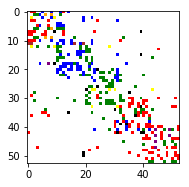

train | iter 4, number of clusters 20, cluster indices [0, 1, 2, 3, 5, 12, 17, 14, 22, 23, 16, 11, 15, 9, 13, 18, 6, 7, 8, 19]
[ 1  2  2  1  0  0  1 18  1 14  1  2  2  2  1  0  0  2  2  2  0  1  1  1
  1  1  2  2  0  2  2  2  1  1  1  1  0  2 16  6 15  3  2 11  1  1  2  2
  2  1  2  1  2 22  0  1  0  1  3  2  2  0  1  2  0  1  1  1  2  0  0  0
  0 13  2  0  0  1  2  2  2  2  1  0  2 11  1  1  0  0  1  2  0  2  1  0
  2  2  0  2  1  1  0  2  0  1  0 15  1  2  0  2  2  1  0 17  1  1  0  0
  1  1  0  0  2  1  2  0  2  2  1  0  1  2  2  3  0  1  2  2 17 14  1  0
  2  2  1  2  1  2 12  2  1  0  0  0  1  2 22  0  1  1  2  2  2  0  2  0
  2  1  1  1  2  0  2  1  2  3  1  1  0  2  1  3  2  0  1  2  2  2  2  1
  0  2  0  1  1  2  5  1  8  1  2  1  2  1  2  0  0  1  3  1  2  0  7  2
  0  1  1  0 14  2  2  3  2 23  5  2  8  2  0  0  1  1  2  1  5  1  1  1
  1  2  0  0  2  1  2  1  2  0  2  0  0  1 17  0  2  2  1  9  2  2  1  2
  2  2  2  0  2  2  0 19  2  2  0  3  1  1  3  0  1  5  2  1  1  0  2 

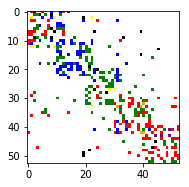

train | iter 5, number of clusters 18, cluster indices [0, 1, 2, 3, 5, 17, 14, 22, 11, 15, 13, 18, 8, 4, 6, 10, 7, 9]
[ 1  2  2  8  0  0  1  1  1 14  1  2  2  2  1 22  0  2  2  2  3  1  1  1
  1  1  2  2  0  2  1  2  1  1  1  1  0  2  3  5  0  3  2 22 22  1  2  2
  2  1  2  1  2 22  0  8  0  1  3  2  2  0  2  2  0  1  1  1  2  0  0  0
  0  1  2  2  0  1  1  2  0  2  1  0  2  2  1  1  0  0  1  2 22  2  1  0
  2  2  0  2  4  1  2  2  0  1  0  9  1  2  0  2  2  1  0  0  1  1  0  0
  1  1  0  0  2  1  2  0  2 17  1  0  1  2  2  3  0  1  2  2 17  1  1  0
  2  2  1  2  1  2  2  2  1 22  0  0  1  2 22  2  1  1  2  8  2  0  2  0
  2  0  1  1  2  0  2  1  2  3  1 18  0  2  1  3 13  0  1  2  2  8  2 14
  0  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  3  1  0  0  2  2
  0  1  1  0 14  2  2  3  2  1  2  2  8  2  0  0  1  1  2  1  5  3  1  2
  1  8  0  0  2  1  2  1  2  0  2  1  0  1 10  0  2  2  1  7 11  2  0  2
  0  2  2  0  2  2  0 15  2  2  0  3  1  1  2  0  1  2  0  1  1  0  2  1
  1  2

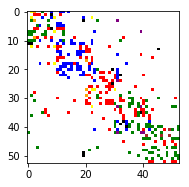

train | iter 6, number of clusters 21, cluster indices [0, 1, 2, 3, 5, 17, 14, 22, 11, 18, 8, 6, 10, 9, 12, 16, 4, 7, 15, 13, 19]
[ 1 12  2  8  0  0  1 18  1 14  1  2  2  2  1  8  0  2  2  2 12  1  1  1
  1  1  2  2  0  2  2  2  1  0  1  1  0  2  2  7  0  3  0  3  0  1  2  1
  2  1  2  1  2 22  0  8  0  0  3  2  2  0  2  0  0  1 13  1  2 16  0  0
  0  1  2  1  0  1 15  2  0  2  1  0  2 22  1  1  0  0  1  0 22  2  1  0
  2  2  0  2 16  1  0  2  0  1  0  1  1  2  0  2  2  1  0 10  1  1  0  0
  1  1  0  0  2  1  2  0  2  2  1  0  1  2  2  3  0  1  2  2 17  1  1  0
  2  2 15  2  1  2  2  2  1  0  0  0  1  2 22  1  1  1  2  8  2  0  2  0
  2  0 11  1  2  0  2  1  2  3  1  1  0  2  1  3  2  0  1  0  2  1  2  1
  0  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  3  2  0  0  2  2
  0  1  1  2 14  2  2  3  2  0  5  2  8 11  0  0  1  1  2  1  5  0 11  2
  1  2  0  0  2  1  2  1  2  0  2  0  0  1  4  0  2  2  1  2 11  2  1  2
  0  2  2  0  2  2  0  9  2  2  0  3  1  1  2  0  4  7  6  1  1  0 

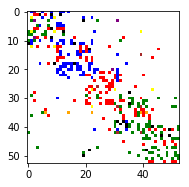

train | iter 7, number of clusters 20, cluster indices [0, 1, 2, 3, 5, 17, 14, 22, 11, 18, 8, 6, 10, 12, 4, 7, 13, 19, 16, 15]
[ 1 12  2  1  0  0  1 18  1 14  1  2  2  2  1 19  0  2  2  2  0  1  1  1
  1  1  2  2  0  2  1  2  1  0  1  1  0  2  2  5  0  3 22  6  0  1  2  1
  2  1  0  1  2 22  0  8  0  0  3  2  2  0  2  0  0  1  0  1  2 19  0  0
  0  1  2  1  0  1 16  2  0  2  1  0  2  6  1  1  0  0  1  0 22  2  1  0
  2  2  0  2  2  1  2  2  0  1  0  1  1  1  2  2  2  1  0 17  1  1  0  0
  1  1  0  0  2  1  2  0  1  2  1  0  1 16  2  3  0  1  2  2  1  1  1  0
  2  2  1  2  1  2  2  2  1  0  0  0  1  2 22  1  1  1  8  8  2  0  2  0
  2  0 11  1  2  2  2  1  2  3  1 18 10  2  1  2  2  0  1  0  2 14  2  1
  2  2  2  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  3  2  0  0  2  2
  0  1  1  0 14  2  2  0  2 15  0  2  8  7  0  0  1  1  2  1  5  0 11  1
  1  2  0  0  2  1  2  1  2  0  2  0  0  1 17  0  2  2  1  4 11  2  1  2
  0  2  2  0  2  2  0  1  2  2  0  3  1  1  2  0  1  5 12  1  1  0  2 

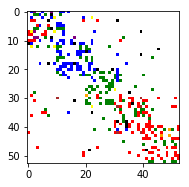

train | iter 8, number of clusters 20, cluster indices [0, 1, 2, 3, 5, 17, 14, 22, 11, 8, 6, 12, 19, 9, 7, 10, 20, 13, 4, 15]
[ 1 12  2  1  0  0  1  2  1 14  1  2  2  2  1 19  0  2  2  2  3  1  1  1
  1  1  2  2  0  2  2  2  1  0  1  3  0  2  2 19  0  3  2  1  0  1  2  1
  2  1  2  1  2  3  0  8  0  0  3  2  2  0  1  0  0  1  0  1  2 20  0  0
  0  1  2  1  0  1 10  2  0  2  1  0  2  0  1  1  0  0  1  2 22  2  1  0
  2  2  0  2  9 14  0  2  0  1  0  1  1  2  2  2  2  1  0 15  1  1  0  0
  1  1  0  0  2  1  2  0  1  2  1  0  1  6  2  3  0  1  2  2  1 14  1  0
  2  2  1  2  1  2  2  2  1  0  0  0  1  2 22  1  1  1  2  8  2  0  2  0
  2  0 11  1  2  0  2  1  2  3  1  1 17  2  1  3  2  0  1  0  2  1  2  1
  0  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  0  2  0  2  2
  0  1  1  0 14  0  2  0  2  1  0  2  8  2  0  0  1  1  2  1  5  0 11  1
  1  2  0  0  2  1  2  1  2  0  2  0  0  1  7  0  2  2  1 20 11  2  1  2
  0  2  2  0  2  2  0  1  2  2  0  3  1  1  2  0  1  8  8  1  1  0  2  

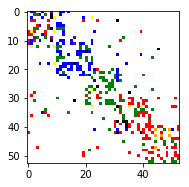

train | iter 9, number of clusters 18, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 7, 20, 13, 4, 16, 18, 6, 9, 10]
[ 1 12  2  1  0  0  1  1  1 14  1  2  2  2  1 18  0  2  2  2 12  1  1  1
  1  1  2  2  0  2  1  2  1  0  1  1  2  2  2  5  0  3  2  3  0  1  2  1
  2  1  2  1  2  3  0  8  0  0  2  2  2  0  2  0  0  1  0  1  2  7  0  0
  2  1  2  1  0  1  6  2  0  2  1  0  2 11  1  1  0  0  1  2 18  2  1  0
  2  2  0  2 20  9  0  2  0  1  0  1  1  1  2  2  2  1  0  7  1  1  0  0
  1  1  0  0  2  1  2  0  1  2  1  0  1  0  2  3  0  1  2  2  1 14  1  0
  2  2  1  2  1  2  2  2  0  0  0  0  1  2 11  1  1  1  2  8  2  0  2  0
  2  0  1  1  2  0  2  1  2  3  1  1  7  2  1  2  2  0  1  0  2  5  2 14
  2  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0 14  2
  0  1  1  0 14  0  2  3  2 13  0  2  8  2  0  0  1  1  2  1  5  0  1  1
  1  2  0  0  2  1  2  1  2  0  2  0  0  0  1  0  2  2  1  2 11  2  1  2
  0  2  2  0  2  2  0  1  2  2  0  3  1  1  2  0  1  8 12  1  1  2  2  1
  1  2

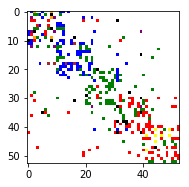

train | iter 10, number of clusters 20, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 7, 13, 16, 18, 9, 10, 4, 6, 15, 17, 19]
[ 1 12  2  1  0  0  1 15  1 14  1  2  2  2  1  1  0  2  2  2  3  1 18  1
  1  1  2  2  0  2  2  2  1  0  1  1  0  2  2  3  3  3  2  3  0  1  2  1
  2  1  2  0  2  3  0  8  0  0  2  2  2  0  1  0  0  1  0  1  2  1  0  0
  0  1  2  1  0  1  4  2  0  2  1  0  2  3  1  1  0  0  1  2  1  2  1  0
  2  2  0  2  7 14  0  2  0  1  0  1  1  1  0  2  2  1  0  1  1  1  0  0
  1  1  0  0  2  1 10  0  2  2  1  0  1  5  2  3  0  1  2  2  1 14  1  0
  2  2  1  2  1  2  2  2  1  0  0  0  1  2  3  1  1  1  8  8  2  0  2  0
  2  0  1  1  2  0  2  1  2  3  1  1  1  2  0  2  2  0  1  0  2 19  2  1
  0  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0  9  2
  0  1  1  0 14  2  2  3  2  1  0  2  8  2  0  0  1  1  2  1  5  0  1 16
 10  5  0  1  2  1  2  1  2  0  2  0  0  0  1  0  2  2  1  6 11  2  7  2
  0  2  2  0  2  2  0  1  2  2  0  3  1  1  2  0  1  8 17  1  1  0  2 

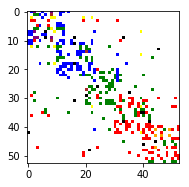

train | iter 11, number of clusters 16, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 16, 4, 17, 15, 20, 9, 6]
[ 1 12  2  1  0  0  1  1  1 14  1  2  2  2  1  1  0  2  2  2  3  1  0  1
  1  1  2  2  0  2  2  2  1  0  1  1  0  2  6  5  0  3  2  3  0  1  2  2
  2  1  2  0  2  3  0  8  0  0  2  2  2  0  2  2  0  1  0  1  2  1  0  0
  0  1  2  1  0  1 20  2  0  2  1  0  2 11  1  1  0  0  1  2  1  2  1  0
  2  2  0  2  1  1  0  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  4
  1  1  0  0  2  1  8  0  2  2  1  0  1  9  2  3  0  1  2  2  1 14  1  0
  2  2  1  2  1  2  2  2  1  0  0  0  1  2 11  1  1  1 15  8  2  1  2  0
  2  0  1  1  2  0  2  1  2  3  1  1  1  2  1  2  2  0  1  0  2  9  2 14
  0  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0 14  2
  0  1  1  0 14  2  2  3  2 12  0  2  8  2  0  0  1  1  2  1  5  0  1  1
  0  2  0  1  2  1  2  1  2  0  2  0  0  0  1  0  2  2  1  5 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  3  1  1  2  0  1  8  0  1  1  0  2  1
  1  2  2  1

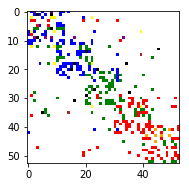

train | iter 12, number of clusters 17, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 17, 15, 9, 6, 7, 10, 4, 13]
[ 0 12  2  8  0  0  1  2  1 14  1  2  2  2  1  1  0  2  2  2  3 12  1  1
  1  1  2  2  0  2  2  2  1  0  1  1  0  2  7  8  0  3  2  3  0  1  2  2
  2  1  2  0  2  3  0  8  0  0  2  2  2  0  2  2  0  2  0  1  2  1  0  0
  0  1  2  2  2  1  2  2  0  2  1  0  2 11  1  1 12  0  1  2  1  2  1  0
  2  2  0  2  2 14  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  6
  1  1  0  0  2  1 15  0  2  2  1  0  1 10  2  3  0  1  2  2  1 14  1  0
  2  2  1  2  1  2  2  2  0  0  0  0  1  2 13  2  1  1 15  8  2  1  2  0
  2  0  1  1  2 14  2  1  2  3  1  1  1  2  0  2  2  0  1  0  2 10  2  1
  0  2  0  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  1  2  0  2  2
  0  1  1  0 14  0  2  0  2 12  0  2  8 11  0  0  1  1  2  1  5  0 11  2
  0  9 12  1  2  1  2  1  2  0  2  0  0  0  1  0  2  2  1  2 11  2  2  2
  0  2  2  0  2  2  0  1 15  2  0  3  1  1  2  0  1  8 17  1  2  0  2  1
  1  2 11

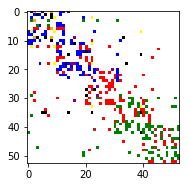

train | iter 13, number of clusters 17, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 17, 15, 6, 16, 18, 7, 4, 10]
[12  4  2 16  0  0  1  2  1 14  1  2  2  2  1  1  0  2  2  2  6 12 11  1
  1  1  2  2  0  2  2  2  1  0  1  1  0  0 18  8  3  3  2  3  0  1  2  1
  2  1  0  0  2  3  0  8  0  0  2  2  2  0  2  0  0  2  0  1  2  1  0  2
  0  1  2  1  5  1  3  2  0  2  1  0  0 11  1 10  0  0  1  2  1  2  1  0
  2  2  0  2  2  7  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0 16
  1  1  0  0  2  1 15  0  1  2  1  0  1 17 15  3  0  6  2  2  1 14  1  0
  2  2  1  2  1  2  2  2  0  0  0  0  1  2 11  1  1 12 15  8  2  1  2  0
  2  0  1  1  2  1  2  1  2  3  1  1  1  2  0  2  2  0  1  0  2 12  2 14
  0  2  2  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  2  0  0 14  2
  0  1  1  0 14  2  2  3  2 12  0  2  8  2  0  0  1  1  2  1  5  0  1  2
  0  2  0  1  2  1  2  1  2  0  2  0  0  0  1  0  2  8  1  1 11  2  2  2
  0  2  2  0  2  2  0  1 15  2  0  3  1  1  2  0  1  8  6  1  1  0  2  1
  1  2 1

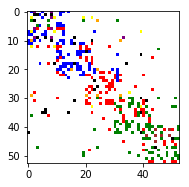

train | iter 14, number of clusters 20, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 17, 15, 6, 16, 7, 4, 9, 10, 13, 18, 19]
[12  6  2  8  0  0  1  2  1 14  1  2  2  2  1  1  0  2  2  2  3 12 15  7
  1  1  2  2  0  2  2  2  1  0  1  1  0  2  0  8  3  3  2  9  0  1  2  1
  2  1  2  0  2  9  3  8  0  8  2  2  2  0  1  0  0  2  0  1  2  1  0  0
  0  1  2  1 19  1 18  2  0  2  1  0  0  0  1  1  0  8  1  2  1  2  1  0
  2  2  0  2  2 14  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  2
  1  1  0  0  2  1 15  0  1  2  1  0  1  4 17  3  0  1  2  2  1 14  1  3
  2  2  1  2  1  2  2  2  0  0  0  0  1  2  0  1  1 12 15  8  2  1  2  0
  2  0  1  1  2  0  2  1  2  3  1  1  1  2  0  2  2  0  1  0  2  4  2 16
  0  2  2  1  1  2  5  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0  2  2
  0  1  1  0 14  2  2  3  2 12  0 11  8  3  0  0  1  1  2  1  5  0  1  1
  0  2  0  1  2  1  2  1 13  0  2  0  0  0  1  0  2  8  1 10 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  3  1  1  2  0  1 15  8  1  2  0  2 

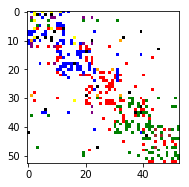

train | iter 15, number of clusters 20, cluster indices [0, 1, 2, 3, 5, 14, 11, 8, 12, 15, 6, 7, 10, 18, 20, 21, 13, 4, 17, 16]
[ 4  6  2 20  0  0  1  2  1 14  1  2  2  2  1  1  0  2  2  2  6 12  0  1
  1  1  2  2  0  2  8  2  1  0  1  3  0  2 16  5  3  3  2  0  0  1  2  1
  2  1  2  0  2  3  0  8  0  8  2  2  2  0  2  2  0  1  0  1  2  1  0  0
  0  1  2  1  3  1  2  2  0  2  1  0  2  0  1  1  0  0  1  2  0  2  1  0
  2  2  0  2  2  7  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  6
  1  1  0  0  2  1 15  0  1  2 10  0  1 13 15 10  0  1  2  2  1  7  1  3
  2  2  2  2  1  2  2  2  0  0  0  0  1  2  0  1  1  3 15  8  2  1  2  0
  2  0  1  1  2  1  2  1  8 10  1  1  1  2  0  2  2  0  1  0  2 12  2  1
  0  2  2  3  1  2 15  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0  2  2
  0  1  1  0 14  2  2  3  2 12  0  4  8 17  0  0  1  1  2  1 15  0  1  1
  0  2  0  1  2  1  2  1 21  0  2  0  0  0  1  0  2  8  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 10  1  1  2  0  1 15  6  1  1  0  2

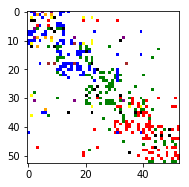

train | iter 16, number of clusters 22, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 7, 10, 21, 4, 17, 16, 9, 13, 18, 19, 22, 20]
[19  6  2  8  0  0  1 13  1 14  1  2  2  2  1  1  0  2  2  2  6 12  0  1
  1  1  2  2  0  2  2  2  1  0  1  1  0  2 20 21  3  3  2  0  0  1  2  1
  2  1  0  0  2  9  0  0  0  0  2  2  2  0 10  0  0  1  0  1  2  1  0  0
  0  1  2  1  3  1  2  2  0  2  1  0  2  0  1  1  0  0  1  2  0  2  1  0
  2  2  0  2 19 15  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0 17
  1  1  0  0  2  1 15  0  1  2  8  0  1  0  2 12  0  1  2  2  1 14  1  3
  2  2  2  2  1  2  2  2  0  0  0  0  1  2  0  1  1 12 15  8  2  1  2  0
  2  0  1  1  2 16  2  1  2 10  1  1  1  2  0  2  2  0  1  0  2  2  2  7
  0  2  0 10  1  2  3  1  0  1  1  1  2  1  2  0  0  1  2  1  0  0  2  2
  0  1  1  0 14  2  2 12  2  0  0 11  8  4  0  0  1  1  2  1 15  0  1  1
  0  2  0  1  0  1  2  1  2  0  2  0  0  0  1  0  2  8  1 18 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  6  1  1  2  0  1 15  8  1 

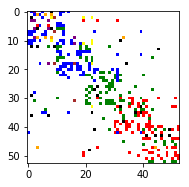

train | iter 17, number of clusters 19, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 10, 9, 18, 22, 5, 16, 7, 13, 4]
[13  6  2  8  0  0  1  2  1 14  1  2  2  2  1  1  0  2  2  2 10 12  0  1
  1  1  2  2  0  2  6  2  1  0  1  1  0  2  5  8  3  3  2  0  0  1  2  1
  2  1  0  0  2 11  0  8  0  0  2  2  2  0 16  0  0  1  0  1  2  1  0  0
  0  1  2  1  3  1 22  2  0  2  1  0  2  0  1  1  0  0  1  2  0  2  1  0
  2  2  0  2  4 13  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0 18
  1  1  0  0  2  1 15  0  1  2  1  0  1  0 15 10  0  1  2  2  1 13  1  0
  2  2  1  2  1  2  2  2  0  0  0  0  1  2  0  1  1 12 15  8  2 14  2  0
  2  0  1  1  2  5  2  1  2 10  1  1  1  2  0  2  2  0  1  0  2 12  2 14
  0  6  0  1  1  2 15  1  0  1  1  1  2  1  2  0  0  1  2  1  0  0  2  8
  0  1  1  0 14  0  2  0  2 12  0  2  8 11  0  0  1  1  2  1 15  0  1  1
  0  2  0  1  0  1  2  1  2  0  2  0  0  0  1  0  2  8  1  1 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  3  1  1  2  0  1 15  0  1  1  0  2  1
 

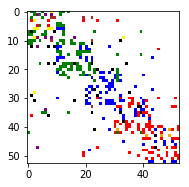

train | iter 18, number of clusters 16, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 10, 22, 4, 7, 9, 5]
[ 2  6  2 14  0  0  1  1  1 14  1  2  2  2  1  1  0  2  2  2  6 12  0  1
  1  1  2  2  0  2  0  2  1  0  1  1  0  2 14  8  0 11  2  0  0  1  2  1
  1  1  0  0  2 11  0  8  0  0  2  2  2  0  1  0  0  1  0  1  2  1  0  0
  2  1  2  2  3  1  7  2  0  2  1  0  2  0  1  1  0  0  1  2  1  2  1  0
  2  2  0  2  2 14  2  2  0  1  0  1  1  1  0  2  2  1  0  1  1  1  0  6
  1  1  0  0  2  1 15  0  1  2  1  0  1  0  2 10  0  1  2  2  1 14  1  0
 15  2  1  2  1  2  2  2  0  0  0  2  1  2  0  1  1 10 15  8  2  1  2  0
  2  0  1  1  2 14  2  1  2 10  1  1  1  2  0  2  2  0  1  0  2  2  2  1
  0 10  0  1  1  2 15  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0  2  8
  0  1  1  0 14  0  2  0  2  2  0 11  8 11  0  0  1  1  2  1 15  0  1  2
  0  2  0  1  2  1  2  1  2  0  2  0  0  0  1  0  2  8  1  2  0  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  6  1  1  2  0  1 15  6  1  1  0  2  1
  1  2  0  1 

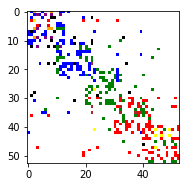

train | iter 19, number of clusters 17, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 10, 22, 4, 5, 9, 13, 7]
[ 1  6  2  8  0  0  1  1  1 14  1  2  9  2  1  1  0  2  2  2 10 12  0  1
  1  1  2  2  0  2  8  2  1  0  1  1  0  2  0  8  0 11  2  0  0  1  2  2
  2  1  0  0  2 11  0  8  0  0  2  2  2  0  1  0  0  1  0  1  2  1  0  0
  0  1  2  1  3  1 22  2  0  2  1  0  2  0  1  1  0  0  1 11  1  2  1  0
  2  2  0  2 15  7  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  8
  1  1  0  0  2  1 15  0  1  2  1  0  1  9 15 10  0  1  2  2  1 14  1  0
 15  2  1  8  1  2  2  2  0  0  0  2  1  2  0  1  1  1 15 15  2  0  2  0
  2  0  1  1  2  0  2  1  4 10  1  1  1  2  0  2  2  0  2  0  2  2  2  1
  0  8  0  1  1  2 15  1  8  1  1  1  2  1  2  0  0  1  2  1  0  0 14  8
  0  1  1  0  1  2  2  0  2  2  0  2  8 11  0  0  1  1  2  1 15  0  1  1
  0  2  0  1  2  1  2  1  2  0  2  0  0  0  1  0  2  8  1  9 11  2  1  2
  2  2  2  0  2  2  0  1 15  2  0 13  1  1  2  0  1 15  5  1  1  0  2  8
  1  2  0

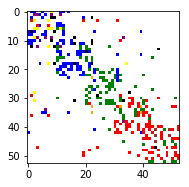

train | iter 20, number of clusters 17, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 10, 5, 9, 13, 7, 16, 4]
[ 3  6  2  8  0  0 16 15  1 14  1  2  2  2  1  1  0  2  2  2  6 12  0  1
  1  1  2  2  0  2  5  0  1  0  1  1  0  2  7  8  0 11  2  0  0  1  2  2
  2  1  2  0  2 11  0  0  0  0  2  2  2  0  1  0  0  1  0  1  2  1  0  0
  0  1  2  1  3  1 15  2  0  2  1  0  2  0  1  1  0  0  1  3  0  2  1  0
  2  2  0  2  4 14  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  6
  1  1  0  0  2  1 15  0  1  2  1  0  1  0  2 15  0  1  2  2  1 14  1  0
 15  2  1 15  1  2  2  2  0  0  0  0  1  2  0  1  1  1 15  8  2  1  2  0
  2  0  1  1  2  7  2  1  2  1  1  1  1  2  0  2  2  0 12  0  2  9  2  1
  0 16  0  1  1  2 15  1  8  1  1  1  2  1 15  0  0  1  2  1  2  0  2  8
  0  1  1  0  1  2  2  0  2  2  3 11 15 11  0  0  1  1  2  1  3  0  1  1
  0  2  0  1  2  1  2  1  8  0  2  0  0  0  1  0  2  8  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 10  1  1  2  0  1 15  6  1  1  0  2  8
  1  2  0

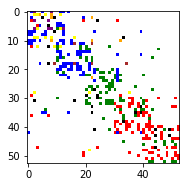

train | iter 21, number of clusters 17, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 10, 13, 16, 4, 17, 18, 7]
[ 0  6  2  8  0  0 16  0  1 14  1  2  2  2  1  1  0  2  2  2 10 12  0  1
  1  1  2  2  0  2 15 15  1  0  1  1  0  2  0  8  3 11  2  0  0  1  2  2
  2  1  0  0  2 11  0  0  0  0  2  2  2  0  8  0  0  1  0  1  2  1  0  0
  0  1  2  1  3  1 18  2  8  2  1  0 15  0  1  1  0  0  1  2  0  2  1  0
  2  2  0  2 13  1  0  2  0  1  0  1  1  1  0  2  2  1  0  1  1  1  0  1
  1  1  0  0  2  1 15  0  1  2  1  0  1  2 15 16  8  1  2  2  1  1  1  0
  7  2  1 15  1  2  2  2  0  0  0  0  1  2  0  1  1  1 15 15  2  1  2  0
  2  0  1  1  2  1  2  1  2 13  1  1  1  2  0  2  2  0  2  0  2 12  2  1
  0 16  0  1  1  2  3  1  0  1  1  1  2  1  2  0  0  1  2 14  0  3 14  8
  0  1  1  0  1  0  2 13  2  2  3  0 15 11  0  0  1  1  2  1  3  0  1  1
  0  2  0  2  2  1  2  1  8  0  2  0  0  0  1  0  2  8  1  1  0  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 16  1  1  2  0  1 13  6  1  1  0  2  8
  1  2 

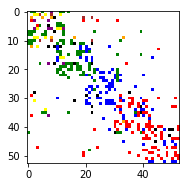

train | iter 22, number of clusters 18, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 13, 16, 5, 9, 10, 17, 4, 7]
[ 3  6 11  8  0  0 16  1  1  1  1  2  2  2  1  1  0  2  2  2  6 12  7  1
  1  1  2  2  0  2  6 15  1  0  1  1  0  2 14  8  1 11  2  0  0  1 11  2
  2  1  0  0  2 11  0  8  0  5  2  2  2  0 17  0  0  1  0  1  2 13  0  0
  0  1  2  1  3  1  2  2  0  2  1  0  9  0  1  1  0  0  1  2  1  2  1  0
  2  2  0  2 13  1  0  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  6
  1  1  0  0  2  1 15  0  1  2  1  0  1  2 11 16  0  1  2  2  1  1  1  0
 16  2  1 15  1  2  2  2  0  0  0  0  1  2 11  1  1  1 15 15  2  1  2  0
  2  0  1  1  2 14  2 16  2 16  1  1  1  2  0  2  2  0  1  0  2  4  2  1
  0 16  0  1  1  2  3  1  8  1 16  1  2  1  2  0  0  1  2  2  0  3  3  8
  0  1  1  2  1  0  2 16  2  2  3  5 15 11  0  0  1  1  2  1  3  0  1  1
  0  2  0  1  2  1  2  1  8  0  2  0  0  0  1  0  2 15  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  3  1  1  2  0  1 13 10  1  1  0  2  8
  1  

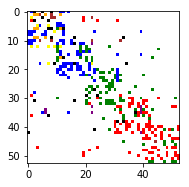

train | iter 23, number of clusters 17, cluster indices [0, 1, 2, 3, 14, 11, 8, 12, 15, 6, 13, 16, 5, 10, 17, 18, 4]
[ 0  6 11  8  0  0 16 14  1  1  1  2  2  2  1  1  0  2  2  2  6 12 18  1
  1  1  2  2  0  2 15 15  1  0  1  1  0  2  0  8  3 11  2  0  0  1 11  2
  2  1  0  0  2 11  0  0  0  5  2  2  2  0 16  0  0  1  0  1  2  1  0  0
  2  1  2  2  3  1 15  2  0  2  1  0  0  0  1  1  0  0  1  2  0  2  1  3
  2  2  0  2 18  1  2  2  0  1  0  1  1  2  0  2  2  1 16  1  1  1  0  4
  1  1  8  0  2  1 15  0  2  2  1  0  1  2 11 16  0  1  2  2  1  1  1  0
 16  2  1 15  1  2  2 17  0  0  0  0  1  2  8  1  1  1 15 15  2  0 11  0
  2  0  1  1  2  0  2 16  2 16  1  1  1  2  0  2  2  0  1  2  2  2  2  1
  0 16  0  1  1  2  3  1  0  1 16  1  2  1  2  3  0  1  2  2  0  0 18  8
  0  1  1  2  1  0  2 16  2  2  3  2 15 11  0  0  1  1  2  1 13  0  1  1
  0  2  0  1  2  1  2  1  8  0  2  0  8  0  1  0  2 15  1  1 11  2  1  2
  2  2  2  0  2  2  0  1 15  2  0 16  1  1  2  0  1 13  6  1  1  0  2  8
  1  2 

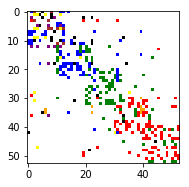

train | iter 24, number of clusters 17, cluster indices [0, 1, 2, 3, 11, 8, 12, 15, 6, 13, 16, 5, 17, 18, 4, 7, 9]
[ 3  6 11  8  0  0 16 13  1  1  1 17  2  2  1  1  0  2  2  2  6  1  7  1
  1  1  2  2  4  2 15 15  1  0  1  1  0  2  9  8 13 11  2  0  0  1 11  2
  2  1  2  0  2 11  0  8  0  5  2  2  2  0 16  0  0  1  0  1  1  1  0  0
  0  1  2  1  3  1  2  2  0 18  1  0 15  0  1  1  0  0  1  2  1  2  1  4
  2  2  0  2 17  1  0  2  0  1  0  1  1  1  0  2  2  1  0  1  1  1  0  6
  1  1  0  0  2  1 15  0  1  2  1  0  1  2 11 16  8  1  2  2  1  1  1  0
 16  2  1 15  1  2  2 16  0  0  0  0  1  2 18  1  1 12 15 15  2  1  2  0
  2  8  1  1  2  1  2 16 15 16  1  1  1  2  0  2  2  0  1  0  2 12  2  1
  0 16  0 16  1  2  3  1  8  1 16  1  2  1  2  0  0  1  2  1  0  3  2  8
  0  1  1  0  1  2  2 13  2  2  3  5 15 11  0  0  1  1  2  1  3  0  1  1
  0  2  0  1  2  1  2  1  8  0  2  0  8  0  1  0  2  8  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 16  1  1  2  0  1 13 15  1  1  0  2  8
  1  2 11

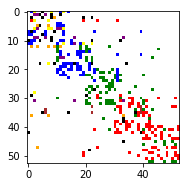

train | iter 25, number of clusters 21, cluster indices [0, 1, 2, 3, 11, 8, 15, 6, 13, 16, 5, 18, 4, 10, 12, 14, 19, 7, 9, 20, 21]
[19  0 11 15  0  0 16  1  1  1  1 18  2  2  1  1  8  2  2  2  6  1  1  1
  1  1  2  2  4  2 15 15  1  0  1  1  0  2  0  8 12 11  2  0  0  1 11  2
  2  1  0  0  2 11  0  8  0  5  2  2  2  0 16  0  0  1  0  1  2  1  0  0
  0  1  2  1 11  1  2  2  0 18  1  0 21  0  1  1  0  0  1  2  1  2  1 16
  2  2  0  2 15  1  0  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  7
  1  1  0  0  2  1 15  0  1  2 10  0  1  2 11  6  8  1  2  2 19  1  1  8
 15  2  2 15  1  2  2 14  0  0  0  0  1  2 11  1  1  6 15 15  2  1  2  0
  2  0  5  1  2  0  2 16 15 16  1  1  1  2  0  2  2  0  1  2  2  2  2  1
  0 16  0 16  1  2  3  1  8  1 16  1  2  1  2  0  0  1  2  1  0  3 18  8
  0  1  1  0  1  2  2  6  2  2  3  1 15 11  0  0  1  1  2  1  3  0  5  1
  0  2  0  1  2  1  2  1  8  0  2  0  8  0  1  0  2  8  1  1 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 13  1  1  2  0  1 15  0  1  1  0

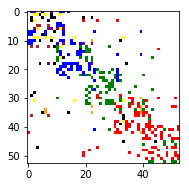

train | iter 26, number of clusters 19, cluster indices [0, 1, 2, 3, 11, 8, 15, 6, 13, 16, 5, 4, 20, 21, 17, 22, 7, 23, 14]
[ 1  0 11  7  0  0 16 20  1  1  1  2  2  2  1  1  0  2  2  2  4  1 14  1
  1  1  2  2  4  2 15 21  1  0  1  1  0  2 17  8  8 11  2  0  0  1 11  1
  2  1  2  0  2 11  0  5  0  5  2  2  2  0 16  0  0  1  0  1  2  1  0  0
  0  1  2  1  3  1  2  2  0  2  1  0  0  0  1  1  0  0  1  2  1  2  1  4
  2  2  0  2 22  1  2  2  0  1  0  1  1  2  0  2  2  1  0  1  1  1  0  8
  1  6  0  0  2  1 15  0  1  2 16  0  1  2 11 16  8  1  2  2  1  1  1  8
 16  2  2 15  1  2  2 22  0  0  0  0  1  2  1  1  1 16 15 15  2  1  2  0
  2  8  5  1  2 17  2 16  2 16  1  1  1  2  0  2  2  0  1  0  2  1  2  1
  0 16  0 16  1  2  3  1  5  1 16  1  2  1  2  0  0  1  2  1  0  3 23  8
  0  1  1  0  1  0  2 13  2  2  3  1 15 11  0  0  1  1  2  1  3  5  1  1
  0  2  0  1  2  1  2  1  8  0  2  0  0  0  1  0  2 15  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0  4  1  1  2  0  1  3  0  1  1  0  2 16


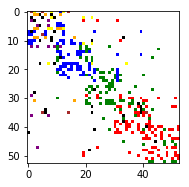

train | iter 27, number of clusters 18, cluster indices [0, 1, 2, 3, 11, 8, 15, 6, 13, 16, 5, 4, 20, 17, 22, 9, 10, 12]
[ 0  0 11 22  0  0 16  1  1  1  1  2  2  2  1  1  0  2  2  2 20  1 10  1
  1  1  2  2  4  2 22  0  1  0  1  1  0  2  2  8  8 11  2  6  0  1 11  1
  2  1  2  0  2 11  0  5  0  5  2  2  2  0 16  0  0  1  0  1  2  1  0  0
  2  1  2  1 11  1  2  2  0  2  1  0  0 11  1  1  0  5  1  2  1  2  1  4
  2  2  0  2  2  1  0  2  0  1  0  1  1  1  0  2  2  1 16  1  1  1  0  4
  1  2  0  0  2  1 15  0  1  2 16  0  1  2 11 20  8  1  2  2  1  1  1  0
 16  2  2 15  1  2  2  2  0  0  0  0  1  2 11  1  1 20 15 15  2  1  2  0
  2  8  1  1  2  0  2 16 22 16  1  1  1  2  0  2  2  0  1  2  2 20  2  1
 17 16  0 16  1  2  3  1  5  1 16  1  2  1  2  0  0  1  2  1  0  3  9  8
  0  1  1  2  1  2  2 20  2  2  3  5 15 11  0  0  1  1  2  1  3 20  1  1
  0  2  0  1  2  1  2  1  8  0  2  0  8  0  1  0  2 15  1  1 11  2  1  2
  2  2  2  0  2  2  0  1 15  2  0 20  2  1  2  0  1 15  0  1  1  0  2 16
  1 

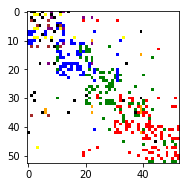

train | iter 28, number of clusters 17, cluster indices [0, 1, 2, 3, 11, 8, 15, 6, 13, 16, 5, 4, 20, 22, 7, 10, 12]
[ 3  0 11  5  0  0 16  0  1  1  1  2  2  2  1  1  0  2  2  2  0  1  0  1
  1  1  2  2  4  2 22  0  1  0  1  1  0  0  2  8 20 11  2 11  0  1 11  1
  2  1  2  0  2 11  0  5  0  5  2  2  2  0 16  0  0  2  0  1  2  1  0  0
  0  1  2  1 22  1  2  2  8  2  1  0  0  6  1  1  0 20  1  2  0  2  1 16
  2  2  0  2  2  1  2  2  0  1  0  1  1  2  2  2  2  1  0  1  1  1  0  1
  1  2  0  0  2  1 15  0  2  2 16  0  1  2 11 16  8  1  2  2  1  1  1  0
  0  2  2  0  1  2  2  2  0  0  0  0  1  2  6  1  1 16 15 15  1  1  2  0
  2  8  1  1  2  2  2 16  2 16  1  1  1  2  0  2  2  0  1  2  2  1  2  1
  0 16  0 16  1  2  3  1  5  1 16  1  2  1  2  0  0  1  2  1  0  3  1  8
  0  1  1  0  1  2  2 20  2  2  3  7 15 11  0  0  1  1  2  1  3 20  1  7
  0  2  0  1  2  1  2  1  0  0  2  0  8  0  1  0  2 15  1  1 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 20  2  1  2  0  1  3  0  1  2  0  2 16
  1  2 1

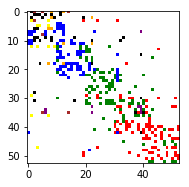

train | iter 29, number of clusters 18, cluster indices [0, 1, 2, 3, 11, 8, 15, 6, 13, 16, 5, 4, 20, 22, 7, 12, 9, 10]
[ 8  0 11 15  0  0 16  7  1  1  2  2  2  2  1  1  0  2  2  2  0  1  0  1
  1  1  2  2  4  2 22  0  1  0  1  1  0  0  2  8 13 11  2  6  0  2 11  2
  2  1  0  0  2 11  0  5  0  5  2  2  2  0 16  0  0  2  0  1  2  1  8  0
  0  1  2  1  8  1  2  2  8  2  1  0  0 12  1  1  0  5  1  2  1  2  1  4
  2  2  0  2  2  1  0  2  0  1  0  1  1  2  2  2  2  1  0  1  1  1  0  0
  1  2  0  0  2  1 15  0  2  2 16  2  1  2 11  0  8  1  2  2  1  1  1  0
  0  2  2  0  1  2  2  2  0  0  0  0  1  2 11  2  1  9 15 22  2  1  2  0
  2  8  1  1  2  2  2 16 22 16  1  1  1  2  0  2  2  0  2  0  2  1  2  1
  2 16  0 16  1  2  3  1  5  1 16  1  2  1  2  0  0  1  2  1  0  3  2  8
  0  1  1  0  1  0  2  8  2  2  3 10 22  7  0  0  1  1  2  1  3 20  1  1
  0  2  0  1  2  1  2  1  8  0  2  8  0  0  1  0  2 15  1  1 11  2  1  2
  0  2  2  0  2  2  0  1 15  2  0 13  2  1  2  0  1 22  0  1  2  2  2 16
  1  

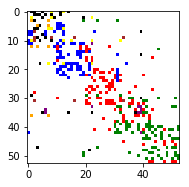

train | iter 30, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 6, 13, 16, 5, 20, 22, 12, 9, 14, 7, 10, 17, 4]
[14  0 11  5  0  0 16  0  1  1  2  2  2  4  1  1  0  2  2  2  0  1  0  1
  1  1  2  2  8  2 22  0  1  0  1  1  0  2  2  8  8 11  6  0  0  2 11  1
  2  1  0  0  2 11  0  5  0  5 17  2  2  0 16  0  0  2  0  1  2  1 22  0
  2  1  2  2  8  1  2  2  0  2  1  0  0  6  1  1  0  8  1  2  0  2  1 16
  2  2  0  2  2  1  0  2  0  1  0  1  1  2  2  2  2  1  0  1  1  1  0  2
  1  2  0  0  2  1 15  0  2  2 16  2  1  0 11  0  8  1  2  2  1  1  1  0
  0  0  2  0  1  2  2  2  0  7  0  0  1  2  6  1  1 20 15 22  2  1  2  0
  2  8  1  1  2  2  2 16 22 16  1  1  1  2  0 17  2  0  2  0  2  9  2  1
  2 16  0 16  1  2  3  1  5  1 16  1  2  1  2  8  0  1  2  1  0  8 10  8
  0  1  1  0  1  0  2  8  2  2  3 12 22 11  0  0  1  1  2  1  3  8  1  1
  0  2  0  1  2  2  2  1  0  0  2  8  0  0  1  0  2 15  1  2 11  2  2  2
  0  2  2  0  2  2  0  1 15  2  0 11  2  1  2  0  1 22  0  1  2  2  2 

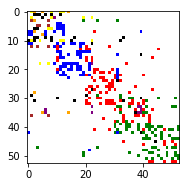

train | iter 31, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 13, 16, 5, 22, 9, 14, 17, 18, 19, 10, 4, 12, 6]
[ 8  0 11 16  0  0 16  2  1  1  2  2  2  2  1 16  0  2  2  2 11  1  0  1
  1  1  2  2  3  2 22  0  1  0  1  1  0  2  2  3 13 11  2  0  0  1 11  1
  2  1  2  0  2 11  0  5  0  5 17  2  2  0 16  0  0  2  0  1  2  1 14  0
  0  1  2  1  8  1  2  2  8  2  1  0  0  0  1  1  0  8  1  2  1  2  1  3
  2  2  0  2  2  1  2  2  0  1  0  1  1  1  2 17  2  1  3 18  1  1  0 18
  1  2  0  0  2  1 15  0  2  0 16  2  1  9 11  0  8  1  2  2  1  1  1  0
  0  2  2  3  1  2  2  2  0  0  0  0  1  2  0  2  1  9 15 22  2  1  2  0
  2  8  1  1  2  2  2 16  2 16  1  1  1  2  0  2  2  0  2  0  2  9  2  1
  2 16  0 16  1  2 22  1  5  1 16  1 11  1  2  3  0  1  2  1  0 14  2  8
  0  1  1  0  1  0  2  8  2  2  3 11 22 11  0  0  1  1  2  1 22  8  1  1
  0  2  0  1  2  1  2  1  0  0  2  8  0  0  1  0  2 15  1  4 11  2  2  2
  0  2  2  0  2  2  0  1 15 19  0 10  2  1  2  0  1 22  0  1  2  2  2

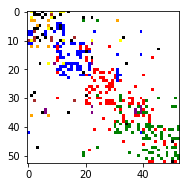

train | iter 32, number of clusters 19, cluster indices [0, 1, 2, 3, 11, 8, 15, 13, 16, 5, 22, 9, 14, 19, 10, 12, 7, 4, 6]
[ 5  0 11  6  0  0 16  1  1  1  2 10  2  2  1  1  0  2  2  2  8  9  0  1
  1  1  2  2 14  2 22  3  2  0  1  1  0  0  2  8 12 11  1  0  0  2 11  1
  2  1  0  0 12 11  0  5  0  5  2  0  2  0 16  0  0  2  0  1  2  1  3  8
  0  1  7  2 19  1  2  2  0  2  1  0  0  0  1  1  0  3  1  2  1  2  1  3
  2  2 12  2  2  1  2  2  0  0  0  1  1  2  2  2  2  1  3  1  1  1  0  8
  1  2  0  0  2  1 15  0  2  2 16  0  1  0 11  0  8  1  2  2  1  1  1  0
  0  0  2  3  1  2  2  2  0  2  0  0  1  2 11  2  1  1 15 22  2  1  2  0
  2  8  1  1 19  2  2 16  2 16  1  1  1  2  0  2  2  0  1  0  2  9  2  1
  2 16  0 16  1  2 22  1  5  1 16  1 11  1  2  3  0  1  2  1 12  3  2  8
  0  1  1  0  1  0  2  8  2  4  3 11 15 13  0  0  1  1  2  1 22  8  1  1
  0  2  0  1  2  2  2  1  8  0  2  8  0  0  1  0  2 15  1 15 11  2  1  2
  0  2  2  0  2  2  0  1 15  7  0  8  2  1  2  0  1 22  0  1  2  2  2 16
 

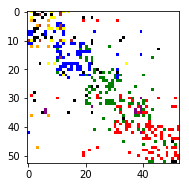

train | iter 33, number of clusters 25, cluster indices [0, 1, 2, 3, 11, 8, 15, 13, 16, 5, 22, 9, 14, 10, 12, 7, 4, 6, 17, 18, 20, 19, 21, 23, 24]
[24  0 11  5  0  0 16  0  1  1  2  2  2  2  1  1  0  2  2  2  0  9  0  1
  1  1  2  2  3  2 15  3  1  0  1  1  0  2  2  8 13 11  2  0  0  2 11  2
  2  1  0 11  2 11 19  5  0  5  2 16  2  0 16  0  0  1  0  1  2  1  5  0
  0  1  7  2 11  1  2  2  8 10  1  0  3  0  1  1  0  8  1  2  1  2  1  3
  2  2 12  2  2  1  2  0  0  1  0  1  1  2  2  2  2  1  0  1  1  1  0 17
  1  2  0  0  2  1 15  0  2  2  1  0  1  0 11  0  8 18  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0 12  0  0  1  2  0  2  1  8 15 15  2  1  2  0
  2  8  1  1  2  2  2 16 22 16  1  1  1  2  0  2  2  0  1  0  2  0  2  1
  2 16  0 16  1  2 22  1  5 14 16  1  2  1  2  3  0  1  2  1 17  3 10  8
  0  1  1  0  1  2  2  8  2  9  3 23 15 11  0  0  1  1  2  1 22  8  1  1
  0  2  0  1  2  2  2  1  8  0  2  8  0  0  1  0  2 15  1  5 11  2  2  2
  0  2  2  0  2  2  0  1 15 10  0  8  2  1  2  0  

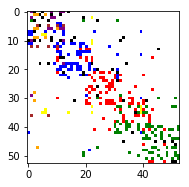

train | iter 34, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 10, 6, 17, 19, 24, 13, 18, 25, 26]
[25  0 11  6  0  0 16  2  1  1  2  2  2 25  1  1  0  2  2  2  0  9  0  1
  1  1  2  2  3  2 15  3  2  0  1  1  0  2  2  8  8 11  2  0  0  2 11 25
  2  1  0 11  2 11  0  5  0  5  2  0  2  0 16  0  0  2  0  1  2  1 24  0
  0  1  6  1  3  1  2  2  3  2  1  0  3  0  1  1  0  8  1  2  0  2  1  3
  2  2  0  2  2  1  2  5  0  1  0  1  1 13  2  2  2  1  3  1  1  1  0  3
  1  2  0  0  2  1 15  0  1  2  1  0  1  0 11  0  8 15  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0  2  8  0  1 19  0  1  1  9 15 15  2  1  2  0
  2  8  1  1  2  2  2 16  2  0  1  1  1  2  0  2  2  0  1  0  2  9  2  1
  2 16  0  1  1  2 22  1  5  1 16  1  2  1  2  8  0  1  2  1  0  3 26  8
  0  1  1  0  1  0  2  8  2  6 15 11 15 11  0  0  1  1  2  1 22  8  1  1
  6  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2 15  1 25 11  2  2  2
  0  2  2  0  2  2  0  1 15 17  0 11  1  1  2  0  1 22  0  1  2  0  

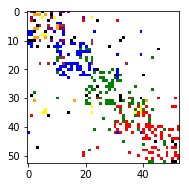

train | iter 35, number of clusters 18, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 6, 17, 24, 13, 4, 7, 10]
[ 5  0 11  6  0  0 16  4  1  1  2  2  2  2  1  1  0  2  2  2  0  9  0  1
  1  1  2  2  3  2 15  8  1  0  1  1  0  2  2  8 11 11  2 11  0  2 11  2
  2  1  2 11  2 11  0  5  0  5  2 16  2  0  3  4  0  1  0  1  2  1  5  0
  0  1  6  1  5  1  2  6  0  2  1  0  3  0  1  1  0  8  1  2  0  2  1 16
  2  2  0  2  2  1  0 10  0  1  0  1  1  2  2  2  2  1 16  1  1  1  0  0
  1  2  0  0  2  1 15  0  1  2  1  0  1  0 11 16  8  2  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0  9  0  0  1  2  0  1  1 22 15 15  2  1  2  0
  2  8  1  1  2  2  2 16  2  0  1  1  1  2  0  2  2  0  1  0  2 13  2  1
  2 16  0  1  1  2 22  1  5  0 16  1  2  1  2  8  0  1  2  1  0  5 17  8
  0  1  1  0  1  0  2  8  2  9  3  2 15 11  0  0  1  1  2  1 22  8  1  1
 11  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2 15  1  2 11  2  2  2
  0  2  2  0  2  2  0  1 15  4  0  7  1  1  2  0  1 22  0  1  1  0  2  6
  0  

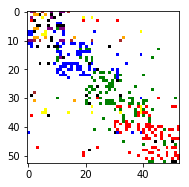

train | iter 36, number of clusters 19, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 6, 24, 13, 4, 7, 10, 12, 14]
[ 8  3 11  6  0  0 16  2  1  1  2  2  2 11  1  1  0  2  2  2  0  9  0  1
  1  1  2  2  3  2 15  8  1  0  1  1  0  2  2  8  7 11  2 11  0  2 11  1
  0  1  2 11  2 11  0  5  0  5  2 16  2  0 16  0  0  1  0  1  9  1  8  0
  0  1  4  1  3  1  2  6  0  2  1  0  8  0  1  1  0  8  1  0  0  2  1  3
  2  2  0  6  2  8  2  7  0  1  0  1  1  2  2  3  9  1  8  1  1  1  0  3
  1  4  0  0  2  1 15  0  1  2  1  0  1  0 11  7  8 15  2  2  9  1  1  0
  0  0  2  8  1  2  2  2  0  0  0  0  1  2  0  1  1 13 15 15  2  1  2  0
  2  8  1  1  2  2  2 16  2 13  1  1  1  6  0  2  2  0  1  0  2  9  2  1
  2 16  0 13  1  9 22  1  5 24 16  1  2  1  4  8  0  1  2  1  0  3  8 16
  0  1  1  0  1  0  2  8  2 12 15 11 15 11  0  0  1  1  2  1 22  8  1  1
 11  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2 15  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  8  0  7  1  1  2  0  1  8  0  1  2  0  2  3
 

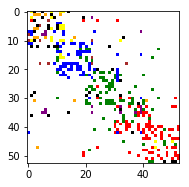

train | iter 37, number of clusters 16, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 6, 13, 7, 17, 14]
[17  3 11  5  0  0 16  1  1  1  2  2  2  2  1  1  0  2  2  2  0  9  0  1
  1  1  2  2  3  2 15  8  1  0  1 17  0  2  2  8  7 11  0 11  0  2 11  2
  2  1  0 11  2 11  0  5  0  5  2 16  2  0 13  0  0  2  0  1 11  1  3  0
  0  1  6  1  3  1  2  6  0  2  1  0  8  0  1  1  0  8  1 11  0  2  1  8
  2  2  0  6  2  1  0 16  0  1  0  1  1  2  2  3  9  1  8  1  1  1  0  1
  1 14  0  0  2  1 15  0  2  2 13  0  1  0 11  7  8  1  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0  9  0  0  1  2  0  6  1  9 15 15  2  1  2  0
  2  8  1  1  2  2  2 16  2  0  1  1  1  6  0  2  2  0  0  0  2  2  2  1
  2 16  0 13  1  2 22  1  5  1 16  1  2  1  2  8  0  1  2  1  0  3  8 16
  0  1  1  0  1  0  2  8  2  0 22  2  6 11  0  0  1  1  6  1 22  8  1  1
 11  2  0  1  2  2  2  1  8  0  2  8  0  0  1  0  2 15  1  2 11  2  2  2
  0  2  2  0  2  2  0  1 15  1  0  7 13  1  2  0  1 22 15  1  2  0  2 13
  2  2 11  1

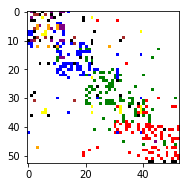

train | iter 38, number of clusters 21, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 6, 13, 7, 4, 10, 12, 18, 19, 20, 17]
[ 9  3 11  7  0  0 16  6  1  1  2  2  2  2  1  1  0  2  2  2  0  9  0  1
  1  1  2  2 18  2 15  8  1  0  1  1  0  2 13  8  7 11  2 11  0  2 11  2
  2  1  0 11  2 11  0  5  0  5  2 16  2  0 13  0  0  2  0  1 11  1  3  0
  0  1  1  6  3  1  2  6  0 22  1  0  8  0  1  1  0  8  1  2  1  2  1  8
  2  2  0  6  2  1  0  2  0  1  0  1  1  2  0  3  2  1  8  1  1  1  0  3
  1  1  0  0  2  1 15  3 20  2 13  0  1  0 11  0  8 10  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0  0  0  0  1  2 11  1  1  8 15 15 20  1  2  0
  2  8  1  1 12  2  2 16  2  0  1  1  1  6  0  2  2  0  0  0  2  9  2  1
  0 16  0 13  1  9 22  1  5 19 16  1 11  1  2  8  0  1  2  1  0  8 22 16
  0  1  1  0  1  0  2  8  2  0 18 11 15 11  0  0  1  1  6  1 22  0  1  1
 11  2  3  1  2  2  2  1  8  0  2  8  0  0  1  0  2  5  1  2 11  2  1  2
  0  2  2  0  2  2  0  1 15  6  0  7 20  1  2  0  1 22  3  1  2  0

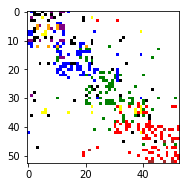

train | iter 39, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 6, 13, 7, 4, 18, 14, 19, 10, 12]
[14  3 11  5  0  0 16  2  1  1  2  2  2 11  1  7  0  2  2  2  0  9  0  4
  1  1  2  2  8  2 15  8  1  0  1 11  0  2  2  8  7 11  2 11  0  2 11  2
  2  1  0 11  2 11  0  5  0  5  2 16  1  0 13  0  0  2  0  1  2  1  3  0
  0  1 12  1  3  1  2  6  8  6  1  0  8  0  1  1  0  8  1  2  0  2  1  8
  2  2  0  6  2  1  2  2  0  1  0  1  1  2  0  2  2  1  8  1  1  1  0  1
  1 13  0  0  2  1 15  0 10  2 13  0  1 18 11  0  8 19  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0  0  0  0  1  2  0  6  1  8 15 15 10  1  2  0
  2  8  1  1  2  6  2 16  2  0  1  1  1  6  0  2  2  0  0  0  2  8  2  1
  0 16  0 10  1  2 22  1  5  0 16  1 11  1  2  8  0  1  2  6  0  8  6 16
  0  1  1  0  1  0  2  8  2  0  8 11 15 11  0  0  1  1  6  1 22  8  1  1
 11  2  0  1  2  2  2  1  8  0  2  8  0  0  1  0  2 16  1  2 11  2  1  2
  0  2  2  0  2  6  0  1 15  6 11  8 13  1  2  0  1 22  3  1  2  0  2 

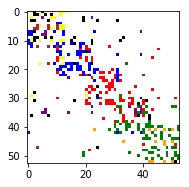

train | iter 40, number of clusters 23, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 22, 9, 6, 13, 7, 14, 17, 20, 21, 4, 19, 23, 18, 12]
[23  3 11  7  0  0 16  0  1  1  2  2  2  2  1 13  0  2  2  2  0  9  0  9
  1  1  2  2 12  2 15  8  1  0  1  1  0  2  2  8 11 11  2  0  0  2 11  2
  0  1  0 15  2 11  0  5  0  5  2  2 19  0 13  0  0  1  0  1  2  1  0  0
  0  1 17  6 14  1  2  6  0 22  1  0  8  0  1  1  0  8  1 20  1  2  1  8
  2  2  0  6  2  1  0  2  0  1  0  1  1  2  2  2  2  1  8  1  1  1  0  4
  1 21  0  0  2  1 15  0  2  2  7  0  1  0 11  0  8  1  2  2  1  1  1  0
  0  2  2  8  1  2  2  2  0  0  0  0  1  2  0  6  1  8 15 15  2  1  2  0
  2  8  1  1  2 19  2 16  2  0  1  1  1  6  0  2  2  0  0  0  2  9  2  1
  0 16  0  8  1  2  8  1  5  2 16  1 11  1  2  8  0  1  2  1  0  8  6 16
  0  1  1  0  1  0  2  8  2  0  8 11 15 11  0  0  1  1  6  1  8  8  1  1
 11  2  4  1  2  2  2  1  8  0  2  0  0  0  1  0  2  5  1  2 11  2  2  2
  0  2  2  0  2 17  0  1 15  6 20  3 21  1  2  0  1 15  3 

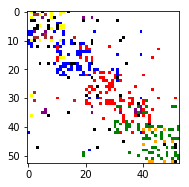

train | iter 41, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 9, 6, 13, 7, 14, 17, 20, 21, 23, 10, 18]
[23  3 11  7  0  0 16 18  1  1  2  2  2  2  1  7  0  2  2  2  3  9  0  9
  1  1  2  2  3  2 15  8  1  0  1  1  0  2  2  8  3 11  0  0  0  2 11  0
  2  1  0 11  2 11 13  5  0  5  2 16  1  0 16  0  0  2  0  1 11  1 23  0
  0  1  6  6 21  1  2  6  0  2  1  0  8  0  1  1  0  8  1  2  1  2  1  8
  2  2  0  6  2  1  0  2  0  0  0  1  1  2  0  2  2  1  8  1  1  1  0  3
  1  2  0  0  2  1 15  0  2  0  7  0  1  0 11  0  8 15  2  2  1  1  1  0
  2  2  2  8  1  2  2  2  0  7  0  0  1  2  0  6  1  9 15 15  2  1  2  0
  2  8  1  1  2  6  2 16  2  7  1  1  1  6  0  2  2  0  0  0  2 21  2  1
  2 16  0  8  1  2  8  1  5  2 16  1 11  1  2  0  0  1  2  6  0  8  6 16
  0  1  1  0  1  0  2  8  2  0  8 11 15 11  0  0  1  1  6  1  8  7  1  1
 11  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2  8  1  2 11  2  2  7
  0  2  2  0  2  6  0  1 15  6 20  3  8  1  2  0  1  8  3  1  2  0  2

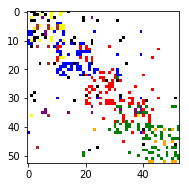

train | iter 42, number of clusters 23, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 9, 6, 13, 7, 14, 17, 10, 18, 4, 12, 19, 20, 21, 22]
[ 0  3 11  7  0  0 16  1  1  1  2  2  2  2  1  7  0  2  2  2  3  9  0  6
  1  1  2  2 12  2 15  8  1  0  1  1  0  2  2  8 20 11  0  0  0  2 11  2
  0  1  2 19  2 11  0  5  0  5  2 16 10  0  3  0  0  1  0  1  2  1  0  0
  0  1 22  1 14  1  2  6  0  6  1  0  8  0  1  1  0  8  1 11  0  2  1  8
  2  2  0  6  2  6  2  2  0  2  0  1  1  2  2  2  2  1  8  1  1  1  0  1
  1  2  0  0  2  1 15  0  8  2  0  0  1  0 11  3  8 21  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0  7  0  0  1 13  0  6  1  4 15 15  2  1  2  0
  2  8  1  1  2 10  2 16 15  0  1  1  1  6  8  2  2  0  0  0  2  9  2  1
  2 16  0  8  1  2  8  1  5  2 16  1 11  1  2  8  0  1  2  6  0  8  6 16
  0  1  1  0  1  0  2  8  2  0  8 11 15 11  0  0  1  1  6  1  8  8  1  1
 15  2  0  1  2  2  2  1  8  0  2  0  0  0  1  0  2  8  1  2 11  2  1  2
 18  2  2  0  2 17  0  1 15  6 11  3  2  1  2  0  1 15  3 

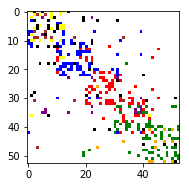

train | iter 43, number of clusters 22, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 9, 6, 7, 14, 17, 10, 18, 19, 23, 24, 25, 26, 4]
[ 8  3 11  5  0  0 16 23  1  1  2  2  2  2  4  7  0  2  2  2 26  9  0  9
  1  1  2  2  8  2 15  8  1  0  1  1  0  2  2  8  8 11  2  0  0  2 11  2
  2  1  0 15  2 11  0  5  0  5  2 16  9  0 24  3  0  2  0  1  2  1 14  0
  0  1 10  6 11  1  2  6  0 15  1  0  8  0  1  1  0  8  1 11  1  2  1  8
  2  2  0  6  2  6  0 10  0  1  0  1  1  2  2  2  2  1  8  1  1  1  0 16
  1  2  0  0  2  1 15  0  2  2  7  0  1  0 11 25  8  1  2  2  1  1  1  0
  0  0  2  8  1  2  2  2  0 11  0  0  1  2  0  6  1  9 15 15  2  1  2  0
  2  8  1  1  2 19  2 16 15  0  1  1  1  6  8  2  2  0  0  0  2 10  2  1
  2 16  0  9  1  2  8  1  8  2 16  1 11  1  2  8  0  1  2  1  0  8  6 16
  0  1  1  0  1  2  2  8  2  0  8 11 15 11  0  0  1  1  6  1  8  8  1  1
 15  2  0  1  2  2  2  1  8  0  2  8  0  0  1  0  2  8  1  2 11  2  2  2
  0  2  2  0  2  6  0  1 15  6 11  8  2  1  2  0  1  8  3  1  

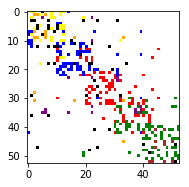

train | iter 44, number of clusters 21, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 9, 6, 7, 17, 10, 18, 19, 23, 26, 12, 4, 13]
[ 2  3 11  7  0  0 16  4  1  6  2  2  2  2  1  7  0  2  2  2  8  9  0  6
  1  1  2  2  8  2 15  8  1  0  1  1  0  2  2  8  7 11  2  0  0  2 11  2
  2  1  2 11  2 11  0  5  0  5  2 16 10 17  9  0  7  1  0  1  2  1  0  0
  0  1 17  1 18  1  2  6  0  6  1  0  8  0  1  1  0  8  1 11  1  2  1  8
  2  1  0  6  2  6  2  2  0  2  0  1  1  2  0  2  2  1  8  1  1  1  0  8
  1  2  0  0  2  1 15  0  2  2 13  0  1  0 11 26  8  2  2  2  1  6  1  0
  0  0  2  8  1  2  2  2  0  7  0  0  1  2  0  1  1  9 15 15  2  1  2  0
  2  8  1  1  2 13  2 16 15  0  1 23  1  6  0  2  2  0  0  0  2  9  2  1
 19 16  0  9  1  2  8  1  5  2 16  1 11  1  2  8 17  1  2  6  0  8  6 16
  0  1  1  0  1  0  2  8  2  0  8 11 15 11  0  0  1  1  6  1 15  8  1  1
 15  2  8  1  0  2  2  1  8  0  2  8  0  0  1  0  2  8  1  2 11  2  2  2
  0  2  2  0  2  6  0  1 15  6 11  8  2  1  2  0  1 15  3  1  2  0

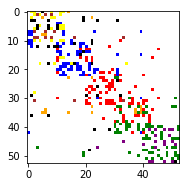

train | iter 45, number of clusters 19, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 9, 6, 7, 10, 18, 19, 23, 4, 13, 12]
[ 2  3 11  5  0  0 16  0  1  6  2  2  2  2  1  9  0  2  2  2  8  9  0  9
  1  1  2  2  8  2 15  8  1  0  1  1  0  2  2  8  1 11  0  0 23  2 11  2
  0  1  0 11  2 11  0  8  0 11 11  0 13  0  7  0  0  2  0  1  2  1  8  0
  0  6  6  6  2  1  2  6  8  4  1  0  8  0  1  1  0  8  1 11  1 10  1  8
  2  1  0  6  2  6  0 16  0  2  0  1  1  2  0  2  2  1  8  1  1  1  0  3
  1  2  0  0  2  1 15  0  2  2  7  0  1  0 11  8  8 15  2  2  1  6  6  0
  8  0  2  8  1  2  2  2  0 12  0  0  1  2  0  6  1  9 15 15  2  1  2  0
  2  8  1  1  2  6  2 16  2  0  1  1  1  6  0  2  2  0  9  0  2  2  2  1
 19 16  0  9  1  2 15  1  8  2 16  1 11  1  2  8  0  1  2  1  0  8  6 16
  0  1  1  0  1  0  2  8  2  9  8 11 15 11  0  0  1  1  6  6 15  8  1  1
 15  2  0  1  2  2  2  1  8  0  2  8  0  0  1  0  2  8  1  2 11  2  2  2
  0  2  2  0  2  6  0  1 15  6 11  8  2  1  2  0  1 15  3  1  2  0  2  7
 

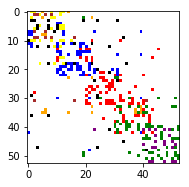

train | iter 46, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 5, 9, 6, 7, 18, 19, 23, 13, 12, 14, 17, 4]
[ 2  3 11  9  0  0 16  1  1  6  2  2  2  2  1  5  0  2  2  2  8  9  0 14
  1  1  2  2  8  2 15  8  1 23  1 11  0  2 19  8  5 11  2  0  0  2 11  2
  2  1  0 11  2 11  0  8  0 11  2  0  2  0 16  0  0  2 23  1  2  1 18  0
  0  6  6  1  3  1  2  6  8 17  1  0  8  0  1  1  0  8  1  2  1  2  1  8
  2  2  5  6  2  6  0 13  0  2  0  1  1  2  0  2 12  1  8  1  1  1  0  7
  1  2  0  0  2  1 15  0  6  2  9  0  1  0 11  8  8  1  2  2  1  6  1  0
  8  0  2  8  1  2  2  2  0  2  0  0  1  2  0  6  1  9 15 15  2  1  2  0
  2  8  1  1  2 19  2 16  2  8  1  1  1  6  0  2  2  0 14  0  2  2  2  1
 19 16  0  0  1  2 15  1  8  2 16  1 11  1  2  8  0  1  2  6  0  8  6 16
  0  1  1  0  1  0  2  8  0 14  8 11 15 11  0  0  1  1  6  6 15  8  1  1
 15  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2  8  1  1 11  2  2  2
  0  2  2  0  2  6  0  1 15  6 11  8  2  1  2  0  1 15  3  1  2  0  2 

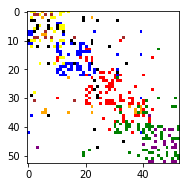

train | iter 47, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 9, 6, 18, 19, 23, 14, 17, 10, 20, 13, 21, 4]
[18  3 11 13  0  0 16  2  1  6  2  2  2  2  1 13  0  2  2  2  8  9  0  9
  1  1  2  2  8  2 15  0  1 23  1  1  0  2 14  8 11  1  0  0 23  2 11  2
  2  1  0 10  2 11  0  8  0 11  2 16  6  0 16  0  0  2 23  1  2  2  0  0
  0  6  6  1 18  1  2  6  8  6  1  0  2  0  1  1  0  8  1  2  1  2  1  8
  2  2  0  6  2  6  2  8  0  1  0  1  1  2  0  2  2  1  8  1  1  1  0 16
  1  2  0  0  2  1 15  0  2  2  9  0  1  0 11  8  8 21  2  2  1  6  6  0
  8  0  2  8  1  2  2  2  0  2  0  0  1  0  0  1  1  9 15 15  2  1  2  0
  2  8  1  1  2  6  2 16  2  8  1  1  1  6  0  2  2  0  9  0  2  2  2  1
 19 16  0 16  1  2 15  1  8  2 16  1  2  1  2  8  0  1  2  6  0  8  6 16
  0  1  1  0  1  0  2  8  0 20  8 11 15 11  0  0  1  1  6  1  8  8  1  1
  8  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2  8  1  0 11  2  2  2
  0  2  2  0  2  4  0  1 15  6  2  8  2  1  2  0  1 15  3  1  1  0  

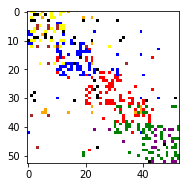

train | iter 48, number of clusters 18, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 9, 6, 19, 23, 10, 20, 21, 5, 7, 4]
[ 8  3 11 15  0  0 16 10  1  6  2  2  0  2  1  9  0  2  2  2  8  9  0 20
  1  1  2  2  8  2 15  2  1  8  1  1  0  2  6  8  9  1  2  0  8  2 11  2
  2  1  2 15  2 11  0  8  0 11  2  0  1  0 16  0  0  2  0  1  2  2  0  0
  0  6  6  1  0  1  2  6  0  2  1  0 10  0  1  1  0  8  1  2  2  2  1  8
  2  2  0  6  2  6  2  2  0  1  0  1  1  2  0  2  2  1  8  1  1  1  0  3
  1  2  0  0  2  1 15  0  2  2 16  0  1  0 11  8  8  1  2  2  1  6  1  0
  0  0  2  8  1  2  2  2  0  2  0  0  1  2  0  1  1  9 15 15  2  1  2  0
  2  8  1  1  2  6  2 16  2  8  1  1 21  6  0  2  2  0  2  0  2  2  2  1
 19 16  0 16  1  2  8  1  8  2 16  1 11  1  2  8  0  1  2  1  0  8  6 16
  0  1  1  0  1  0  2  8  0  9  8 11 15 11  0  0  1  1  6  6  8  8  1  1
 23  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2  8  1  0 11  2  2  2
  0  2  2  0  2  6  0  1 15  6  7  8  2  1  2  0  1  8 15  1  2  0  2 16
  2  

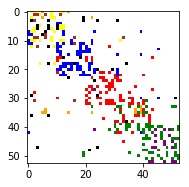

train | iter 49, number of clusters 20, cluster indices [0, 1, 2, 3, 11, 8, 15, 16, 9, 6, 19, 23, 10, 21, 12, 5, 7, 13, 14, 17]
[17  0 11  9  0  0 16  2  1  6  2  2  0  2  1 13  0  2  2  2  8  2  0  9
  1  1  2  5  8  2 15  8  1  8  1  1  0  2 19  8 11  1  2  0  0  2 11  2
  0  1  0 10  2 14  0  8  0 11  2 16  6  0 16  0  0  2  8  1  2  2  0  0
  0  6  6  1  0  1  2  6  8  3  1  0 12  0  1  1  0  8  1  2  2  2  1  8
  2  2  2  6  2  6  0  2  0  1  2  1  1  2  0  2  2  1  8  1  1  1  0 21
  1  2  0  0  2  1 23  0  2  2 16  0  1  0 11  8  8 15  2  2  1  6  6  0
  8  0  2  8  1  2  2  2  0  2  0  0  1  2  0  1  1  8 15 15  2  1  2  0
  2  8  1  1  2  6  2 16  2 16  1  1  2  6  0  2  2  0  2  0  2  2  2  1
 19 16  0 16  1  2  8  1  8  2 16  1 11  1  2  8  0  1  2  6 12  8  6 16
  0  1  1  0  1  0  2  8  0  0  8 11 15 11  0  0  1  1  6  6  8  8 11  1
 10  2  0  1  0  2  2  1  8  0  2  8  0  0  1  0  2  8  1  0 11  2  2  2
  0  2  2  0  2  1  0  1 15  6 11  8  1  1  2  0  1  7  0  1  2  0  2

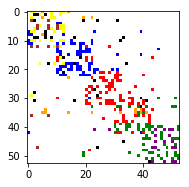

run time =  1305.478440284729


In [5]:
train = {
    'n_burnin': 5,
    'n_iter': 50,
}
start = time.time()
state,sample_params,train = mdnd(4,np.array(links_train),train)
stop = time.time()
print('run time = ',stop-start)

In [6]:
clusters = sample_params['assignments'][49]
edges = links_train
plt.set_cmap('gist_rainbow')
g = nx.MultiDiGraph()
unique_edges = []
unique_clusters = []
unique_index = []
for i,e in enumerate(edges):
    if node_clusters[e[0]] == node_clusters[e[1]]:
        g.add_edge(e[0], e[1], weight=100)
    else:
        g.add_edge(e[0], e[1], weight=1)
    unique_edges += [(e[0], e[1])]
    unique_clusters += [clusters[i]]
    unique_index += [i]

pos = nx.nx_agraph.pygraphviz_layout(g, prog='neato')

<Figure size 432x288 with 0 Axes>

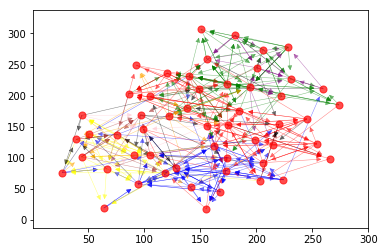

In [7]:
node = sorted([i for i in pos.keys()])
cluster_color = get_color(unique_clusters)
nx.draw_networkx_nodes(g, pos, nodelist=node, node_size=50, alpha=0.7)
nx.draw_networkx_edges(g, pos, edgelist=unique_edges, edge_color=cluster_color, width=0.5,alpha=0.5)
plt.savefig('gibbs_viz',format='pdf')
plt.show()

sequential variational inference
average score by Lin  1.0362843639650923
merged  0
pruned  0
9
average score by Lin  1.147042040671941
merged  0
pruned  0
9
average score by Lin  1.165095224755577
merged  0
pruned  0
9
self.train | iter 0


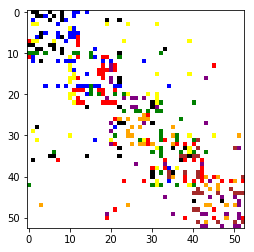

[-9.139545083817342, -8.573624854756828, -8.312684367965769, -8.057842135133665, -7.995528492496669, -7.911049646682931, -7.948033879203086, -7.96244968024801, -7.789172292433984]


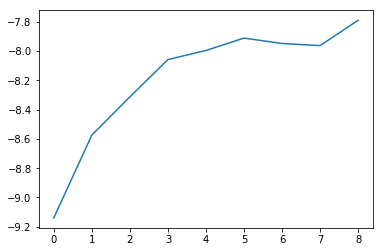

run time =  1.792999505996704


In [13]:
from sequentialDN_future import sequentialDN
DN = sequentialDN(links_train, np.array(nodes), links_test)
start = time.time()
DN.vi_train_stochastic()
stop = time.time()
print('run time = ',stop - start)
sequential_clusters = DN.get_map()
# edges, clusters = DN.generate(100)
# display_adjacency(edges, clusters)

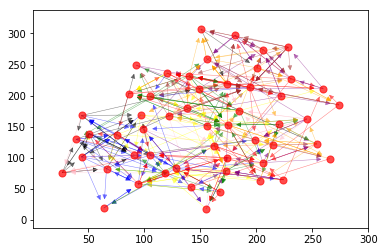

In [14]:
unique_clusters = np.array(sequential_clusters)[unique_index]
cluster_color = get_color(unique_clusters)
node = sorted([i for i in pos.keys()])
nx.draw_networkx_nodes(g, pos, nodelist=node, node_size=50, alpha=0.7)
nx.draw_networkx_edges(g, pos, edgelist=unique_edges, edge_color=cluster_color, width=0.5,alpha=0.5)
plt.show()

stochastic variational inference
number of clusters  31
train | iter 0


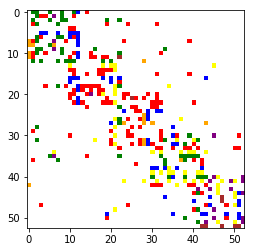

number of clusters  33
train | iter 1


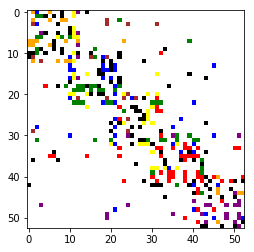

number of clusters  33
train | iter 2


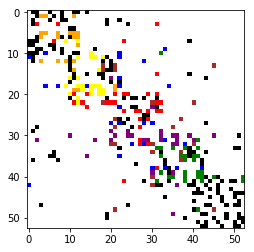

number of clusters  33
train | iter 3


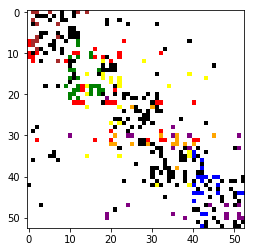

number of clusters  33
train | iter 4


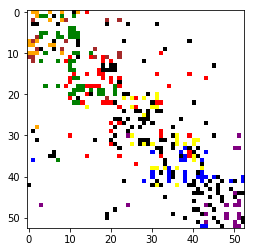

number of clusters  33
train | iter 5


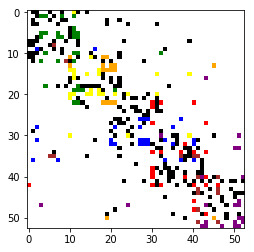

number of clusters  33
train | iter 6


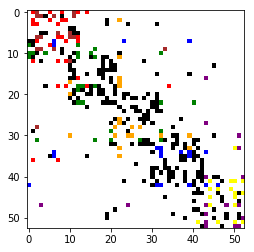

number of clusters  33
train | iter 7


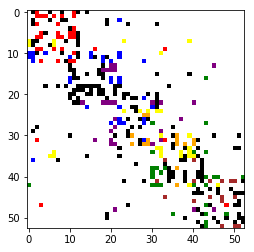

number of clusters  33
train | iter 8


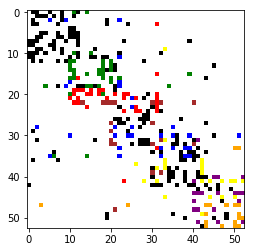

number of clusters  33
train | iter 9


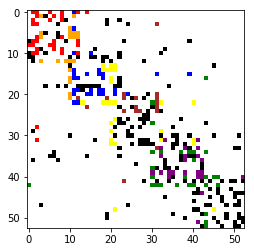

[-13.074828700467933, -10.763289536163864, -8.765460329708537, -9.267339286620953, -9.04095881817469, -8.883859292910845, -8.778789288811483, -8.917415604013874, -8.946643220838503, -8.960254864125508]


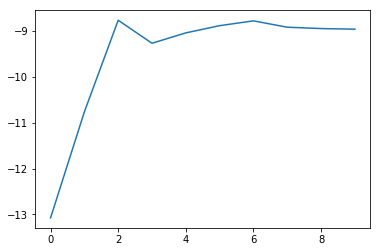

run time =  17.694042205810547


In [15]:
from trunfreeDirichletMix import trunfreeInfiniteClusterDirichletMix as trunfreeDirichletMix
start = time.time()
state, vi, train = trunfreeDirichletMix(2, links_train,np.array(nodes),links_test)
stop = time.time()
print('run time = ',stop - start)

[2 2 6 5 2 2 1 6 0 0 6 5 6 6 1 2 1 2 2 1 2 2 3 2 6 1 3 2 2 2 5 1 6 1 2 2 6
 1 3 5 5 2 2 2 1 1 6 2 6 6 6 3 4 2 2 5 2 5 5 5 6 2 5 6 2 1 1 1 6 1 2 1 2 2
 4 6 5 0 1 4 1 1 0 2 1 2 5 6 0 5 6 5 2 2 0 1 2 2 2 6 1 1 2 3 2 2 2 1 6 2 2
 1 1 2 1 6 2 6 2 6 2 5 2 2 3 5 0 2 2 2 2 2 5 2 6 5 1 5 1 2 6 0 6 2 5 5 1 2
 0 2 2 5 3 1 2 2 1 2 2 6 0 2 5 5 2 6 6 2 1 1 5 1 5 6 1 1 5 5 5 5 6 4 3 5 1
 2 2 6 2 2 6 0 1 5 2 2 6 1 5 5 5 6 1 5 6 5 6 2 2 1 3 6 1 2 1 5 2 6 5 2 6 6
 2 5 6 2 2 5 5 5 2 1 0 5 6 1 5 5 5 5 0 1 2 6 2 1 6 6 1 2 6 1 1 3 5 2 1 5 0
 6 5 2 1 2 6 3 2 2 6 4 2 2 2 6 2 5 5 6 3 2 5 5 2 6 1 2 2 5 2 2 0 2 6 2 5 2
 5 2 2 2 1 5 3 5 6 5 1 0 6 2 5 6 5 2 0 4 2 4 2 0 5 5 1 2 4 2 2 1 2 6 2 1 5
 5 5 4 6 2 5 6 3 2 4 5 2 6 2 2 2 5 2 2 0 2 2 1 5 5 2 0 1 5 1 2 2 2 1 3 1 0
 5 6 6 2 5 5 5 2 6 2 2 5 2 1 1 5 2 6 1 2 2 2 2 2 2 2 3 5 3 2 3 2 2 3 2 0 6
 2 1 2 0 2 1 1 1 2 0 6 5 6 2 3 5 5 6 4 2 5 5 5 2 1 5 2 2 6 1 5 6 1 2 3 5 2
 1 2 2 6 2 0]
450
450


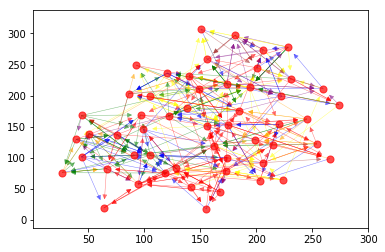

In [16]:
trunfree_clusters = state['assignments'][train['best_validation']]
print(trunfree_clusters)
print(len(trunfree_clusters))
print(len(unique_index))
unique_clusters = np.array(trunfree_clusters)[unique_index]
cluster_color = get_color(unique_clusters)
node = sorted([i for i in pos.keys()])
nx.draw_networkx_nodes(g, pos, nodelist=node, node_size=50, alpha=0.7)
nx.draw_networkx_edges(g, pos, edgelist=unique_edges, edge_color=cluster_color, width=0.5,alpha=0.5)
plt.show()

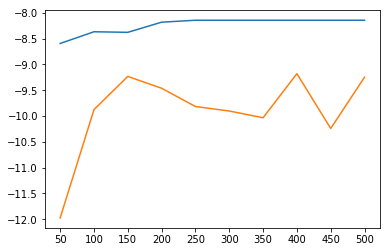

In [12]:
sequential_ll = [-8.593266900610274, -8.366262149187582, -8.377490940758353, -8.180822158554474, -8.143191825671357,-8.143191825671357,-8.143191825671357,-8.143191825671357,-8.143191825671357,-8.143191825671357]
truncation_ll = [-11.974750429074787, -9.874790432461978, -9.2317666626395, -9.461626901671144, -9.81523960477634, -9.902510734228745, -10.033196931010492, -9.178954625038891, -10.240917120981955, -9.247384152425981]
plt.xticks(np.arange(0,10,1),np.arange(50,550,50))
plt.plot(sequential_ll)
plt.plot(truncation_ll)